# Documentation

Loading the library

In [1]:
import pySPM

Let's set some variable and libraries to retrieve the data and plot them

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

filename = os.getenv("HOMEPATH") + r"\ownCloud\AFM\161222_OffResSS_CristA\CristA_0002.xml"

Let's load the data (forward topography) and plot it

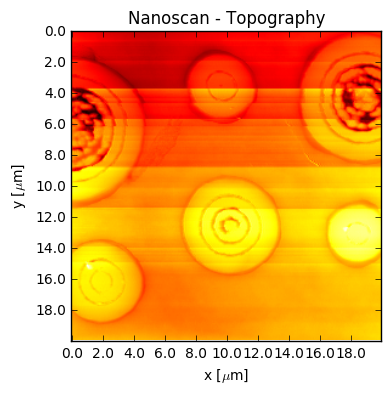

In [3]:
topo = pySPM.SPM_image(filename)
topo.show()

We can correct the data while loading them. Either by lines or by slope.

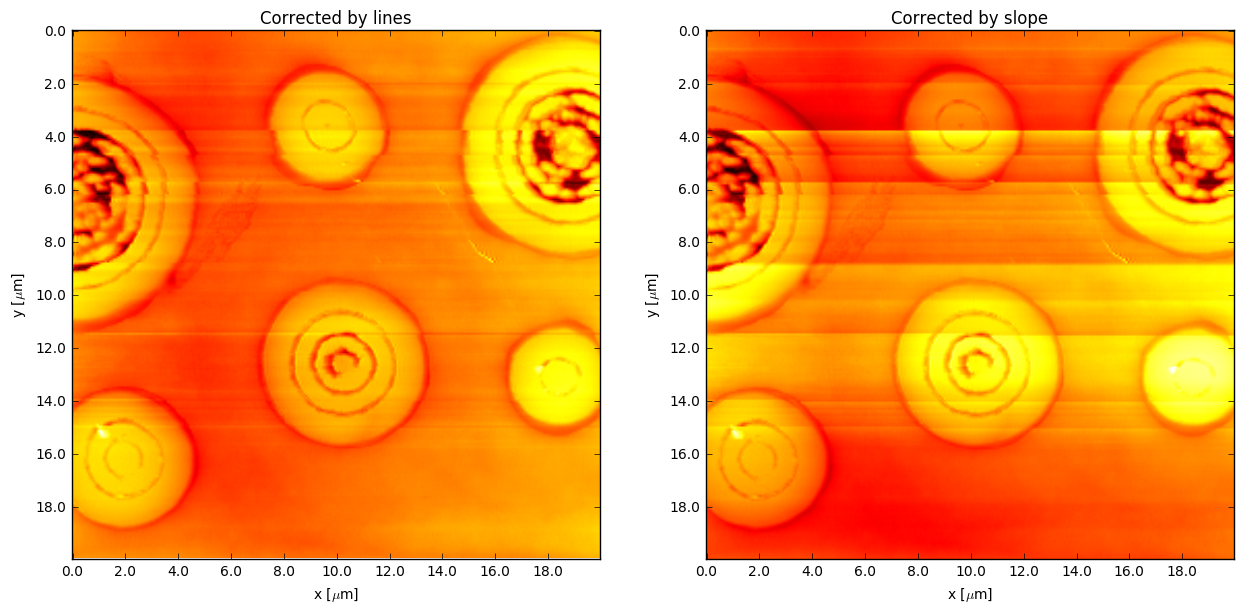

In [4]:
topo2 = pySPM.SPM_image(filename,corr="lines")
topo3 = pySPM.SPM_image(filename,corr="slope")

fig, ax = plt.subplots(1,2,figsize=(15,7))
topo2.show(ax=ax[0])
ax[0].set_title("Corrected by lines")
topo3.show(ax=ax[1])
ax[1].set_title("Corrected by slope");

A better way to correct the data is by defining pathes that should be flat and each line will be offseted automatically in order to get the defines lines as flat as possible. First let's display the data with the pixel values in the axis instead of the real size. The pixels coordinated will be used to define the path.

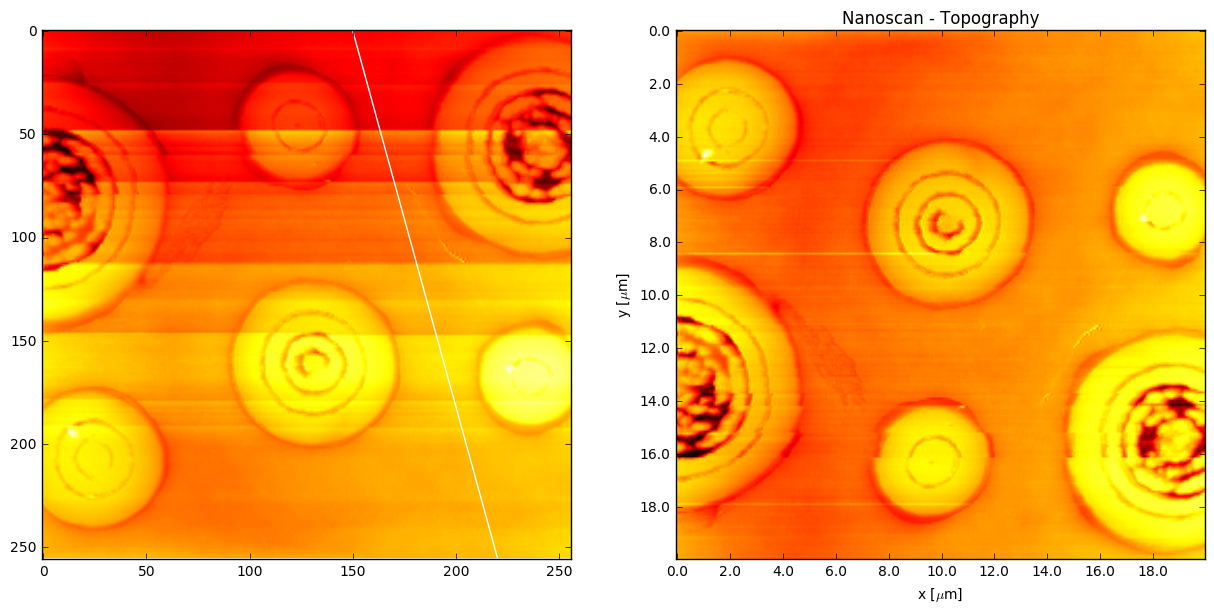

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot([150,220],[0,255],'w-');
topo.show(pixels=True,ax=ax[0])
topoC = topo.Offset([[150,0,220,255]],inline=False)
topoC.show(ax=ax[1])

in this particular case, the line (150,0) → (220,255) should be flat.
Here we used unline=False in order to create a new object with the corrected data and keep the data of topo untouched.

We should now remove the scars from the image

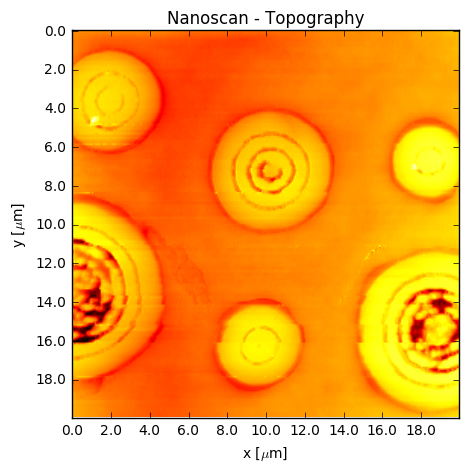

In [7]:
topoD = topoC.filterScarsRemoval(inline=False)

fig, ax = plt.subplots(1,1,figsize=(5,5))
topoD.show(ax=ax)